In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data

In [2]:
data_dir = './'
data = pd.read_csv(data_dir + 'data_total.tsv',  sep='\t')

In [3]:
print("total data shape:",data.shape)

total data shape: (184279, 46)


In [4]:
print("data describe:",data.describe())

data describe:        m_effective_daily_price  m_pricing_cleaning_fee        dim_lat  \
count            184279.000000           184279.000000  184279.000000   
mean                149.405456               38.014286      43.551959   
std                 272.233310               49.998184       6.817239   
min                 -55.000000                0.000000      33.708763   
25%                  71.349427                0.000000      34.129663   
50%                 100.000000               25.000000      48.844982   
75%                 152.346733               53.947735      48.871037   
max               12995.000000              800.000000      49.187890   

             dim_lng  dim_person_capacity    m_checkouts      m_reviews  \
count  184279.000000        184279.000000  184092.000000  184092.000000   
mean      -44.277191             3.265234      18.461883      10.971194   
std        59.187486             2.009478      32.309469      20.020473   
min      -122.510925       

In [5]:
print(data.columns)
print(data.dtypes)

Index(['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 'id_user_anon',
       'm_effective_daily_price', 'm_pricing_cleaning_fee', 'dim_market',
       'dim_lat', 'dim_lng', 'dim_room_type', 'dim_person_capacity',
       'dim_is_instant_bookable', 'm_checkouts', 'm_reviews',
       'days_since_last_booking', 'cancel_policy', 'image_quality_score',
       'm_total_overall_rating', 'm_professional_pictures',
       'dim_has_wireless_internet', 'ds_night_day_of_week',
       'ds_night_day_of_year', 'ds_checkin_gap', 'ds_checkout_gap',
       'occ_occupancy_plus_minus_7_ds_night',
       'occ_occupancy_plus_minus_14_ds_night', 'occ_occupancy_trailing_90_ds',
       'm_minimum_nights', 'm_maximum_nights', 'price_booked_most_recent',
       'p2_p3_click_through_score', 'p3_inquiry_score',
       'listing_m_listing_views_2_6_ds_night_decay',
       'general_market_m_unique_searchers_0_6_ds_night',
       'general_market_m_contacts_0_6_ds_night',
       'general_market_m_reservation_r

In [6]:
#print(data.head(20))
print(data['dim_room_type'].value_counts())

Entire home/apt    129885
Private room        47546
Shared room          6848
Name: dim_room_type, dtype: int64


# observe data

['Los Angeles' 'Los Angeles' 'Los Angeles' ... 'San Francisco'
 'San Francisco' 'San Francisco']
False    31718
True     20980
Name: dim_is_requested, dtype: int64
False    9514
True     8363
Name: dim_is_requested, dtype: int64
False    82537
True     31167
Name: dim_is_requested, dtype: int64


<Figure size 432x288 with 0 Axes>

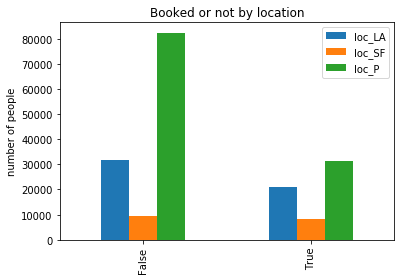

In [7]:
print(data.dim_market.values)
loc_LA = data.dim_is_requested[data.dim_market == 'Los Angeles'].value_counts()
loc_SF = data.dim_is_requested[data.dim_market == 'San Francisco'].value_counts()
loc_P = data.dim_is_requested[data.dim_market == 'Paris'].value_counts()
print(loc_LA)
print(loc_SF)
print(loc_P)
df = pd.DataFrame({'loc_LA':loc_LA,'loc_SF':loc_SF,'loc_P':loc_P})
plt.figure()
df.plot(kind = 'bar')
plt.title('Booked or not by location')
plt.ylabel('number of people')
plt.show()

In [8]:
print('Unique user:', data['id_user_anon'].unique().shape)
print('Unique listing:', data['id_listing_anon'].unique().shape)


Unique user: (7936,)
Unique listing: (10442,)


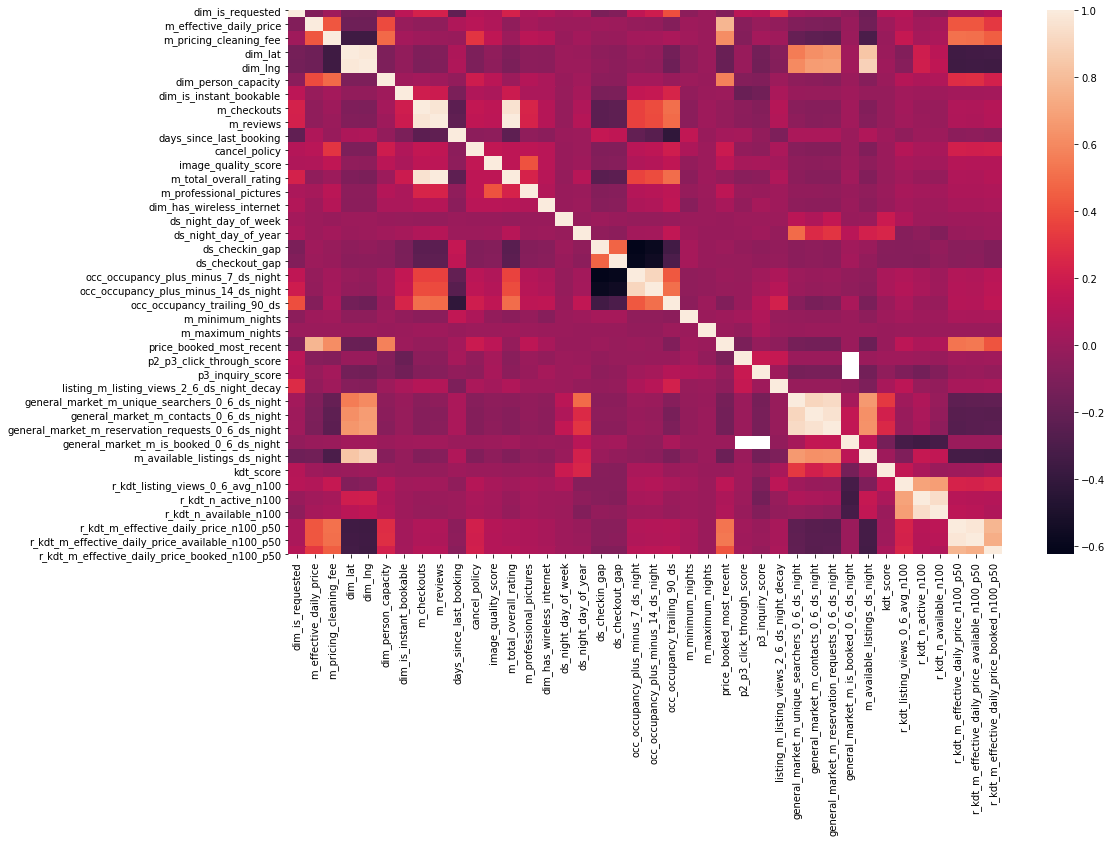

In [3]:
corr_Mat = data.corr()
f,ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap(corr_Mat)

In [6]:
k = 15
#加绝对值把最正负相关的
rela_corr = corr_Mat.apply(abs).nlargest(k,'dim_is_requested',keep='last').index.values
#矩阵的ij是数值
print('Most related features:\n',corr_Mat['dim_is_requested'][rela_corr])


Most related features:
 dim_is_requested                              1.000000
occ_occupancy_trailing_90_ds                  0.397357
listing_m_listing_views_2_6_ds_night_decay    0.274125
m_checkouts                                   0.231641
m_total_overall_rating                        0.229227
m_reviews                                     0.225445
days_since_last_booking                      -0.215444
occ_occupancy_plus_minus_14_ds_night          0.196271
m_available_listings_ds_night                -0.165552
dim_lng                                      -0.147375
occ_occupancy_plus_minus_7_ds_night           0.139429
dim_lat                                      -0.139256
dim_is_instant_bookable                       0.127496
p2_p3_click_through_score                     0.122704
ds_checkin_gap                               -0.112305
Name: dim_is_requested, dtype: float64


In [12]:
# show dataset.
data[rela_corr]

,dim_is_requested,occ_occupancy_trailing_90_ds,listing_m_listing_views_2_6_ds_night_decay,m_checkouts,m_total_overall_rating,m_reviews,occ_occupancy_plus_minus_14_ds_night,occ_occupancy_plus_minus_7_ds_night,dim_is_instant_bookable,p2_p3_click_through_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_m_effective_daily_price_booked_n100_p50,kdt_score,p3_inquiry_score,cancel_policy
0,False,0.000000,0.133333,24.0,74.0,19.0,NaN,NaN,False,NaN,1.795918,98.0,1.314286,NaN,4
1,True,0.359551,0.066667,105.0,263.0,55.0,NaN,NaN,True,NaN,2.693878,42.0,0.535714,NaN,3
2,False,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,False,NaN,2.775510,46.0,0.714286,NaN,3
3,True,0.000000,0.733333,0.0,0.0,0.0,0.0,0.0,False,NaN,4.576531,115.0,1.744681,NaN,5
4,True,0.133333,1.000000,9.0,5.0,1.0,0.0,0.0,False,NaN,4.877551,164.5,1.200000,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184274,True,0.000000,0.333333,3.0,5.0,1.0,0.0,0.0,False,NaN,6.358163,80.0,1.177419,NaN,4
184275,True,0.731959,0.533333,52.0,149.0,32.0,0.0,0.0,True,NaN,2.163265,100.0,1.153846,NaN,4
184276,True,0.764045,7.333333,4.0,5.0,1.0,0.0,0.0,False,0.309857,1.071429,55.0,1.559524,0.210933,4
184277,False,0.067416,0.000000,6.0,0.0,0.0,0.0,0.0,True,NaN,1.852041,228.0,1.211268,0.449412,3


In [13]:
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(data[rela_corr].astype(np.float64), height=3)
#plt.show()

In [4]:
dataset=data.copy(deep = True)

In [5]:
#missing data
num_null = data.isnull().sum().sort_values(ascending = False)
percent_null = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([num_null, percent_null], axis = 1, keys = ['total_num','percentage'])
print(missing_data[missing_data.percentage.values != 0])

                                                  total_num  percentage
p3_inquiry_score                                     129290    0.701599
p2_p3_click_through_score                            127110    0.689769
days_since_last_booking                               37836    0.205319
price_booked_most_recent                              37836    0.205319
occ_occupancy_plus_minus_7_ds_night                   20727    0.112476
occ_occupancy_plus_minus_14_ds_night                  20652    0.112069
image_quality_score                                   14011    0.076031
r_kdt_m_effective_daily_price_booked_n100_p50         12975    0.070410
occ_occupancy_trailing_90_ds                          10218    0.055449
listing_m_listing_views_2_6_ds_night_decay             2346    0.012731
ds_checkin_gap                                         2221    0.012052
ds_checkout_gap                                        2221    0.012052
m_maximum_nights                                       2221    0

In [16]:
#plot for categorial features
def cate_plot(df,col):
    ax = df[col].value_counts().sort_index(ascending = False)
    ax.index.name
    ax.plot(kind='bar')

outlier data:
 Float64Index([2147483647.0,      10000.0,       9999.0,       5000.0,
                    3650.0,       3000.0,       2112.0,       2000.0,
                    1825.0,       1500.0,       1444.0,       1299.0,
                    1210.0,       1200.0,       1150.0,       1126.0,
                    1125.0,       1120.0,       1111.0,       1100.0],
             dtype='float64')


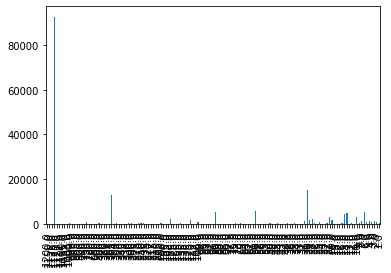

In [17]:
# outlier data
print('outlier data:\n',data['m_maximum_nights'].value_counts().sort_index(ascending = False).index[0:20])
# plot without outlier data
dataset.loc[dataset['m_maximum_nights'] > 1200, 'm_maximum_nights'] = 1200
cate_plot(dataset,'m_maximum_nights')


In [18]:
def num_plot(df,col, bins = 100):
    df[col].hist(bins = bins)

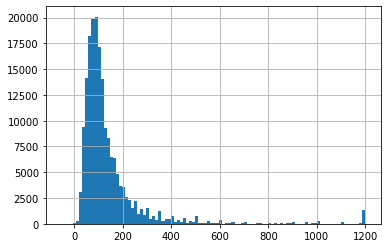

In [19]:
#outlier data
dataset.loc[dataset['m_effective_daily_price'] > 1200, 'm_effective_daily_price'] = 1200
num_plot(dataset,'m_effective_daily_price')

# featur engineering and selection

In [6]:
#add month feature by date
from datetime import datetime, timedelta
date_to_month_func = lambda d: datetime.strptime(d,'%Y-%m-%d').strftime('%-m')
dataset['ds_night_month_of_year'] = dataset['ds_night'].apply(date_to_month_func)
print(dataset['ds_night_month_of_year'].value_counts().sort_index())

1     19016
10    13559
11    14329
12    15585
2     16974
3     17387
4     15487
5     15086
6     12374
7     13893
8     17081
9     13508
Name: ds_night_month_of_year, dtype: int64


In [7]:
date_to_workday_func = lambda d:0 if datetime.strptime(d,'%Y-%m-%d').strftime('%w') in ['0','6'] else 1
dataset['ds_nigth_workday'] = dataset['ds_night'].apply(date_to_workday_func)
print(dataset['ds_nigth_workday'].value_counts())

1    131354
0     52925
Name: ds_nigth_workday, dtype: int64


In [15]:
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder
#将listing 和user id 转换成int
#将其他 categorial 转化为 numerial
label_encoder = LabelEncoder()
cols =['id_listing_anon','id_user_anon','dim_market', 'dim_room_type']
for col in cols:
    dataset[col] = label_encoder.fit_transform(dataset[col].values)
    print(dataset[col].value_counts().sort_index())


0        12
1        46
2         7
3        43
4         2
         ..
10437    42
10438    10
10439    48
10440    38
10441     6
Name: id_listing_anon, Length: 10442, dtype: int64
0       52
1        4
2        2
3        4
4        1
        ..
7931    14
7932    59
7933     3
7934     1
7935    15
Name: id_user_anon, Length: 7936, dtype: int64
0     52698
1    113704
2     17877
Name: dim_market, dtype: int64
0    129885
1     47546
2      6848
Name: dim_room_type, dtype: int64


In [9]:
######calculate mean values by user id
mean_values_cols = [ 'm_effective_daily_price', 'm_reviews','days_since_last_booking',
                    'm_total_overall_rating']
mean_values_by_user = dataset[['id_user_anon'] + mean_values_cols].groupby(by = 'id_user_anon').mean()
print(mean_values_by_user)
for col in mean_values_cols:
    id_user_mean = mean_values_by_user[col].to_dict()
    dataset[col+'_by_user'] = dataset['id_user_anon'].apply(lambda x: id_user_mean[x])
print(dataset)


                                      m_effective_daily_price  m_reviews  \
id_user_anon                                                               
00112d6e-a52c-4fbd-b96b-212a7662c06a                58.048200   6.865385   
001d90dd-4010-483e-8924-0f8953b46f54                92.674408   0.000000   
001dfc6b-2d7a-47d8-8d25-a9a3579b9af4               140.000000   4.000000   
00213009-d301-4d5f-97c3-4baffa7c2fa9               259.082695   1.250000   
002cef72-0f32-4290-ac10-c2dfe777a29d               105.000000   3.000000   
...                                                       ...        ...   
ffcccaed-e067-4483-9937-7f231d22f32d                52.459014   5.714286   
ffce53a3-8be8-476a-8a4b-4a142eb1cffc               132.731854   2.474576   
ffd76266-c328-4587-a94a-072c30c82a27               165.000000   0.000000   
fff265c1-bd2c-4fd0-bd14-0c9c0e76a8af               134.694493   0.000000   
fff96686-72b9-439f-86c9-24ecb9e7a72d               172.088487   9.266667   

           

In [10]:
######calculate mean values by listing id
mean_values_cols = [
    'm_effective_daily_price', 'm_pricing_cleaning_fee',
     'occ_occupancy_plus_minus_14_ds_night',
     'occ_occupancy_plus_minus_7_ds_night',
                    'price_booked_most_recent',
                     'listing_m_listing_views_2_6_ds_night_decay',
                    'occ_occupancy_trailing_90_ds']
mean_values_by_listing = dataset[['id_listing_anon'] + mean_values_cols].groupby(by= 'id_listing_anon').mean()
#print(mean_values_by_listing)
for col in mean_values_cols:
    id_listing_mean = mean_values_by_listing[col].to_dict()
    dataset[col+'_by_listing'] = dataset['id_listing_anon'].apply(lambda x: id_listing_mean[x])

In [11]:
#dummy features by user id
dummy_features = ['dim_market','dim_room_type']
for feat in dummy_features:
    dummy = pd.get_dummies(dataset[feat])
    #print(dummy)
    dummy.columns=['%s_%s_by_user'%(feat.split('_')[-1],col) for col in dummy.columns]
    #print(dummy.columns)
    dummy['id_user_anon'] = dataset['id_user_anon'].values
    dummy = dummy.groupby('id_user_anon').sum()
    print(dummy)
    dataset = dataset.merge(dummy, on = 'id_user_anon', how = 'left')
    #print(dataset)

                                      market_Los Angeles_by_user  \
id_user_anon                                                       
00112d6e-a52c-4fbd-b96b-212a7662c06a                         0.0   
001d90dd-4010-483e-8924-0f8953b46f54                         0.0   
001dfc6b-2d7a-47d8-8d25-a9a3579b9af4                         0.0   
00213009-d301-4d5f-97c3-4baffa7c2fa9                         0.0   
002cef72-0f32-4290-ac10-c2dfe777a29d                         0.0   
...                                                          ...   
ffcccaed-e067-4483-9937-7f231d22f32d                         0.0   
ffce53a3-8be8-476a-8a4b-4a142eb1cffc                         0.0   
ffd76266-c328-4587-a94a-072c30c82a27                         0.0   
fff265c1-bd2c-4fd0-bd14-0c9c0e76a8af                         0.0   
fff96686-72b9-439f-86c9-24ecb9e7a72d                         0.0   

                                      market_Paris_by_user  \
id_user_anon                                         

In [12]:
#convert boolean to 0/1
boolean_cols = ['dim_is_requested', 'dim_is_instant_bookable']
for col in boolean_cols:
    dataset[col] = dataset[col].astype(np.int8)
print(dataset[boolean_cols])

        dim_is_requested  dim_is_instant_bookable
0                      0                        0
1                      1                        1
2                      0                        0
3                      1                        0
4                      1                        0
...                  ...                      ...
184274                 1                        0
184275                 1                        1
184276                 1                        0
184277                 0                        1
184278                 0                        0

[184279 rows x 2 columns]


In [13]:
# fill null values
missing_cols = missing_data[missing_data.percentage.values != 0].index

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
for col in missing_cols:
    #舍弃变量'p2_p3_click_through_score', 'p3_inquiry_score'
    if col in['p2_p3_click_through_score', 'p3_inquiry_score']:
        continue
    dataset[[col]] = imputer.fit_transform(dataset[[col]])
print(data[missing_data.index])
dataset[missing_data.index].isnull().sum()

        p3_inquiry_score  p2_p3_click_through_score  days_since_last_booking  \
0                    NaN                        NaN                    320.0   
1                    NaN                        NaN                      3.0   
2                    NaN                        NaN                      NaN   
3                    NaN                        NaN                      NaN   
4                    NaN                        NaN                     34.0   
...                  ...                        ...                      ...   
184274               NaN                        NaN                    232.0   
184275               NaN                        NaN                      2.0   
184276          0.210933                   0.309857                     83.0   
184277          0.449412                        NaN                     26.0   
184278          0.260755                   0.254386                    372.0   

        price_booked_most_recent  occ_o

p3_inquiry_score                                      129290
p2_p3_click_through_score                             127110
days_since_last_booking                                    0
price_booked_most_recent                                   0
occ_occupancy_plus_minus_7_ds_night                        0
occ_occupancy_plus_minus_14_ds_night                       0
image_quality_score                                        0
r_kdt_m_effective_daily_price_booked_n100_p50              0
occ_occupancy_trailing_90_ds                               0
listing_m_listing_views_2_6_ds_night_decay                 0
ds_checkin_gap                                             0
ds_checkout_gap                                            0
m_maximum_nights                                           0
m_minimum_nights                                           0
m_professional_pictures                                    0
m_checkouts                                                0
m_reviews               

In [16]:
#normalization
normalizer = StandardScaler()
cols_to_normal = [
        'm_effective_daily_price', 'm_pricing_cleaning_fee',
        'm_checkouts', 'm_reviews',
       'days_since_last_booking',
       'm_total_overall_rating',
       'm_minimum_nights', 'm_maximum_nights', 'price_booked_most_recent',
       'listing_m_listing_views_2_6_ds_night_decay',
       'r_kdt_listing_views_0_6_avg_n100', 'r_kdt_n_active_n100',
       'r_kdt_n_available_n100', 'r_kdt_m_effective_daily_price_n100_p50',
       'r_kdt_m_effective_daily_price_available_n100_p50']
for col in cols_to_normal:
    dataset[[col]] = normalizer.fit_transform(dataset[[col]])
print(dataset[cols_to_normal])


        m_effective_daily_price  m_pricing_cleaning_fee  m_checkouts  \
0                     -0.144749                0.439731     0.171875   
1                     -0.291682               -0.760315     2.679970   
2                     -0.089649               -0.760315    -0.571265   
3                     -0.082792                1.739782    -0.571265   
4                      0.225208                3.239841    -0.292588   
...                         ...                     ...          ...   
184274                -0.171687               -0.760315    -0.478372   
184275                 0.040142                0.039716     1.038871   
184276                -0.416264               -0.160292    -0.447408   
184277                -0.548816               -0.760315    -0.385480   
184278                 0.369517                0.839747    -0.509337   

        m_reviews  days_since_last_booking  m_total_overall_rating  \
0        0.401606                 2.331782                0.30105

In [17]:
print(dataset)

        dim_is_requested    ds_night          ds  id_listing_anon  \
0                      0  2015-01-06  2014-12-07              450   
1                      1  2015-01-21  2014-12-22             5320   
2                      0  2015-01-22  2014-12-23             4348   
3                      1  2015-02-02  2015-01-03             4233   
4                      1  2015-02-13  2015-01-14               80   
...                  ...         ...         ...              ...   
184274                 1  2015-06-29  2015-05-30             8672   
184275                 1  2015-08-17  2015-07-18             9245   
184276                 1  2015-09-03  2015-08-04             8332   
184277                 0  2015-10-07  2015-09-07             7401   
184278                 0  2015-12-15  2015-11-15             2685   

        id_user_anon  m_effective_daily_price  m_pricing_cleaning_fee  \
0               6805                -0.144749                0.439731   
1               2623     

In [30]:
num_null = dataset.isnull().sum().sort_values(ascending = False)
percent_null = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([num_null, percent_null], axis = 1, keys = ['total_num','percentage'])
print(missing_data[missing_data.percentage.values != 0].index)

Index(['p3_inquiry_score', 'p2_p3_click_through_score',
       'price_booked_most_recent_by_listing',
       'days_since_last_booking_by_user',
       'occ_occupancy_trailing_90_ds_by_listing',
       'occ_occupancy_plus_minus_7_ds_night_by_listing',
       'occ_occupancy_plus_minus_14_ds_night_by_listing',
       'listing_m_listing_views_2_6_ds_night_decay_by_listing',
       'm_reviews_by_user', 'm_total_overall_rating_by_user'],
      dtype='object')


In [ ]:
dataset.columns

In [32]:
#Drop columns
# Cols including listing and user id, date, ones with too much null values
cols = ['id_listing_anon', 'id_user_anon', 'p3_inquiry_score', 'p2_p3_click_through_score',
       'price_booked_most_recent_by_listing',
       'days_since_last_booking_by_user',
       'occ_occupancy_trailing_90_ds_by_listing',
       'occ_occupancy_plus_minus_7_ds_night_by_listing',
       'occ_occupancy_plus_minus_14_ds_night_by_listing',
       'listing_m_listing_views_2_6_ds_night_decay_by_listing',
       'm_reviews_by_user', 'm_total_overall_rating_by_user' ,
        'ds_night', 'ds', ]

# Cols according to heatmap
'''
cols += ['dim_lat', 'dim_lat', 'm_checkouts', 
        'general_market_m_unique_searchers_0_6_ds_night', 'general_market_m_contacts_0_6_ds_night','occ_occupancy_plus_minus_14_ds_night_by_listing',
       'occ_occupancy_plus_minus_7_ds_night_by_listing',
       'price_booked_most_recent_by_listing',
       'listing_m_listing_views_2_6_ds_night_decay_by_listing',
       'occ_occupancy_trailing_90_ds_by_listing']

'''

# Cols according to gbdt tree
cols += ['dim_market', 'dim_room_type',  'dim_has_wireless_internet', 'cancel_policy']
dataset.drop(cols, axis=1, inplace=True)

In [34]:
dataset.isnull().sum()

dim_is_requested                                      0
m_effective_daily_price                               0
m_pricing_cleaning_fee                                0
dim_lat                                               0
dim_lng                                               0
dim_person_capacity                                   0
dim_is_instant_bookable                               0
m_checkouts                                           0
m_reviews                                             0
days_since_last_booking                               0
image_quality_score                                   0
m_total_overall_rating                                0
m_professional_pictures                               0
ds_night_day_of_week                                  0
ds_night_day_of_year                                  0
ds_checkin_gap                                        0
ds_checkout_gap                                       0
occ_occupancy_plus_minus_7_ds_night             

In [36]:
#save processed data
dataset.to_csv('processed_data.csv', sep = '\t', index = False)

# Model Training and evaluation

In [37]:
import os
#import pandas as pd

In [38]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import metrics

In [39]:
data_folder = "./"
data = pd.read_csv(os.path.join(data_folder, "processed_data.csv"),sep='\t')
data

,dim_is_requested,m_effective_daily_price,m_pricing_cleaning_fee,dim_lat,dim_lng,dim_person_capacity,dim_is_instant_bookable,m_checkouts,m_reviews,days_since_last_booking,...,ds_nigth_workday,m_effective_daily_price_by_user,m_effective_daily_price_by_listing,m_pricing_cleaning_fee_by_listing,market_Los Angeles_by_user,market_Paris_by_user,market_San Francisco_by_user,type_Entire home/apt_by_user,type_Private room_by_user,type_Shared room_by_user
0,0,-0.144749,0.439731,34.053932,-118.362970,2,0,0.171875,0.401606,2.331782,...,1,127.298658,111.145946,60.000000,137.0,0.0,0.0,51.0,86.0,0.0
1,1,-0.291682,-0.760315,34.108578,-118.208600,2,1,2.679970,2.200539,-0.501150,...,1,114.461538,76.776119,0.000000,91.0,0.0,0.0,24.0,67.0,0.0
2,0,-0.089649,-0.760315,34.077194,-118.205700,1,0,-0.571265,-0.547830,-0.349226,...,1,125.000000,125.000000,0.000000,70.0,0.0,0.0,0.0,70.0,0.0
3,1,-0.082792,1.739782,34.093494,-118.247340,6,0,-0.571265,-0.547830,-0.349226,...,1,135.121000,191.507622,125.000000,376.0,0.0,0.0,228.0,148.0,0.0
4,1,0.225208,3.239841,34.097540,-118.363556,5,0,-0.292588,-0.497860,-0.224112,...,1,257.755274,244.324111,200.000000,386.0,0.0,0.0,386.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184274,1,-0.171687,-0.760315,37.753384,-122.500374,1,0,-0.478372,-0.497860,1.545353,...,1,101.785772,101.785772,0.000000,0.0,0.0,41.0,0.0,41.0,0.0
184275,1,0.040142,0.039716,37.765903,-122.427490,2,1,1.038871,1.051221,-0.510086,...,1,137.208468,137.208468,44.090909,0.0,0.0,55.0,0.0,55.0,0.0
184276,1,-0.416264,-0.160292,37.773777,-122.403130,4,0,-0.447408,-0.497860,0.213786,...,1,44.079013,37.399878,30.000000,0.0,0.0,224.0,0.0,16.0,208.0
184277,0,-0.548816,-0.760315,37.758934,-122.437300,2,1,-0.385480,-0.547830,-0.295606,...,1,0.000000,0.000000,0.000000,0.0,0.0,41.0,41.0,0.0,0.0


In [40]:
#get training and label data
X = data.drop('dim_is_requested', axis = 1)
y = data['dim_is_requested']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

bst_acc = 0
bst_clf = None
models = []
models.append(('LR', LogisticRegression(C = 2.0, solver='liblinear', class_weight = None, random_state = 33)))
models.append(('DT', DecisionTreeClassifier()))
models.append(("RFR",RandomForestRegressor(n_estimators=20, max_leaf_nodes = 40, min_samples_leaf = 20,random_state = 22))) 
models.append(('GBDT',GradientBoostingClassifier(learning_rate = 0.1,min_samples_split = 300,min_samples_leaf = 20,max_depth = 8 ,verbose = 0)))
models.append(('Ada',AdaBoostClassifier(n_estimators=200)))
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    for k, (tr_idx, te_idx) in enumerate(kfold.split(X)):
        X_train, X_test = X.loc[tr_idx,:], X.loc[te_idx, :]
        y_train, y_test = y[tr_idx], y[te_idx]
        model = model.fit(X_train, y_train)
        acc = model.score(X_test,y_test)
        print("{} model ".format(name)+ "%d fold "%(k+1) + "accuracy:{:.2f}".format(acc))
        if acc > bst_acc:
            bst_acc = acc
            bst_clf = model
            bst_X_test, bst_y_test = X_test.copy(deep = True), y_test.copy(deep = True)

            

LR model 1 fold accuracy:0.76
LR model 2 fold accuracy:0.75
LR model 3 fold accuracy:0.76
LR model 4 fold accuracy:0.76
LR model 5 fold accuracy:0.76
DT model 1 fold accuracy:0.79
DT model 2 fold accuracy:0.78
DT model 3 fold accuracy:0.78
DT model 4 fold accuracy:0.78
DT model 5 fold accuracy:0.78
RFR model 1 fold accuracy:0.30
RFR model 2 fold accuracy:0.30
RFR model 3 fold accuracy:0.30
RFR model 4 fold accuracy:0.29
RFR model 5 fold accuracy:0.29
GBDT model 1 fold accuracy:0.85
GBDT model 2 fold accuracy:0.85
GBDT model 3 fold accuracy:0.85
GBDT model 4 fold accuracy:0.85
GBDT model 5 fold accuracy:0.85
Ada model 1 fold accuracy:0.81
Ada model 2 fold accuracy:0.81
Ada model 3 fold accuracy:0.81
Ada model 4 fold accuracy:0.81
Ada model 5 fold accuracy:0.81


In [44]:
#Evaluatioin metric
y_pred = bst_clf.predict(bst_X_test)
acc = metrics.accuracy_score(bst_y_test, y_pred)
cfm = metrics.confusion_matrix(bst_y_test, y_pred)
report = metrics.classification_report(bst_y_test, y_pred)
print("Best accuracy:", acc)
print("Confusion matrix:\n", cfm)
print("Classification report:\n", report)

Best accuracy: 0.8075159408492741
Confusion matrix:
 [[21939  2817]
 [ 4277  7822]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86     24756
           1       0.74      0.65      0.69     12099

    accuracy                           0.81     36855
   macro avg       0.79      0.77      0.77     36855
weighted avg       0.80      0.81      0.80     36855



In [45]:
#Feature importance
coef = pd.Series(bst_clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print('Feature importance:\n',coef)

Feature importance:
 m_effective_daily_price                               0.185
m_effective_daily_price_by_listing                    0.080
occ_occupancy_trailing_90_ds                          0.060
listing_m_listing_views_2_6_ds_night_decay            0.045
m_available_listings_ds_night                         0.040
days_since_last_booking                               0.035
type_Entire home/apt_by_user                          0.035
general_market_m_reservation_requests_0_6_ds_night    0.030
r_kdt_m_effective_daily_price_booked_n100_p50         0.025
price_booked_most_recent                              0.025
market_Paris_by_user                                  0.025
m_effective_daily_price_by_user                       0.025
dim_lng                                               0.020
m_pricing_cleaning_fee_by_listing                     0.020
ds_night_day_of_year                                  0.020
occ_occupancy_plus_minus_7_ds_night                   0.020
m_minimum_nights   